# Академия: Практикум

## Радиальная структура и миграция звёзд в диске Млечного Пути

Млечный Путь — это динамическая система.
Звёзды рождаются на разных галактоцентрических расстояниях, со временем мигрируют и взаимодействуют с крупномасштабными структурами, такими как спиральные волны плотности. В результате современное распределение звёзд в диске Галактики отражает как условия их рождения, так и их последующую динамическую эволюцию.

Современные спектроскопические и астрометрические обзоры (APOGEE, Gaia и др.) позволяют изучать диск Млечного Пути с высоким уровнем детализации. Однако интерпретация этих данных требует ясной концептуальной модели, связывающей:
- наблюдаемые свойства звёзд (металличность, возрастные прокси, пространственное распределение),
- динамику Галактики (вращение, радиальную миграцию),
- и крупномасштабную структуру диска (inside-out формирование, спиральные рукава).

Этот практикум сопровождает статью [1] и направлен на построение наглядной, физически мотивированной, но намеренно упрощённой модели диска Млечного Пути.

Цель здесь — не полноценная численная симуляция, а создание прозрачной физической картины, помогающей интерпретировать наблюдательные закономерности.

---

### Что демонстрирует этот практикум

В данном ноутбуке мы:
- Строим прокси-представление диска Галактики, опираясь на реальные наблюдательные данные.
- Иллюстрируем концепцию inside-out формирования диска, при которой звездообразование со временем смещается к большим радиусам.
- Вводим радиальную миграцию как медленный накопительный процесс, действующий на уже сформированные звёзды.
- Визуализируем спиральные волны плотности как структуры, проходящие через звёздное население, а не состоящие из фиксированных звёзд.
- Показываем, как звёзды входят и выходят из спиральных рукавов, временно изменяя своё окружение.

Основной акцент делается на:
- физическую интуицию,
- прозрачные допущения,
- и визуальные диагностические инструменты.

---

### Чего этот практикум не делает

Чтобы избежать неправильной интерпретации, важно сразу обозначить ограничения:
- Это не самосогласованная гравитационная симуляция.
- Здесь не решаются уравнения Пуассона или гидродинамики.
- Модель не претендует на количественные оценки, предоставляя лишь качественный обзор интересующих нас свойств Млечного Пути

Вместо этого используется контролируемая иллюстративная модель, основанная на реальных распределениях данных и предназначенная для:
- обучения,
- интерпретации,
- и визуального исследования.

---
### Отношение к научным статьям из раздела Литература

В данном практикуме активно используются идеи, результаты и концептуальные подходы, представленные в научных статьях, перечисленных в разделе Литература. Эти работы служат отправной точкой и интеллектуальным фундаментом для упражнений и визуализаций, представленных в ноутбуке.

При этом важно подчеркнуть, что данный практикум не ставит своей целью оспаривать, проверять или обсуждать научные выводы авторов этих статей. Мы не стремимся воспроизвести их анализы во всех деталях и не вступаем в научную дискуссию относительно конкретных количественных результатов.

Цель этого практикума иная по своему характеру:
- перевести ключевые идеи из литературы в наглядную, визуальную и исследовательскую форму;
- побудить читателя выйти за рамки отдельных статей, сформировав более целостное представление об эволюции Галактики;
- стимулировать размышления о том, как различные процессы — звездообразование, химическое обогащение, радиальная миграция, спиральные волны плотности — совместно действуют во времени, формируя Млечный Путь как сложную динамическую систему.

В этом смысле практикум следует рассматривать как концептуальное обобщение и образовательное расширение идей, изложенных в указанных работах, а не как комментарий к их научной корректности. Он приглашает читателя исследовать, как известные физические механизмы могут сочетаться и взаимодействовать, и каким образом из этого взаимодействия возникают наблюдаемые структуры и закономерности.

**Этот ноутбук — приглашение задуматься о Млечном Пути не как о статичном фото, а как о живой системе, эволюционирующей на протяжении космического времени.**

---

## Часть I. Наблюдательные данные и реконструкция параметров звезд

В первой части этого практического занятия мы исследуем наблюдательные наборы данных о звездах, которые составляют эмпирическую основу нашего анализа. Мы характеризуем звезды, имеющие планеты, используя однородные спектроскопические параметры, и реконструируем их основные физические свойства — прежде всего, возраст звезд — с помощью стандартных моделей звездной эволюции. 

Цель этой части — создать согласованный, физически обоснованный набор параметров, который впоследствии будет использоваться для моделирования и вывода данных в масштабе Галактики.

---
### Загрузка данных и начальная подготовка

В первой ячейке загружается предварительно обработанный набор данных, основанный на наблюдениях APOGEE и Gaia.

Этот набор данных используется как статистический прокси-диск Галактики, а не как буквальная физическая модель отдельных звёзд.

На этом этапе мы:
- Загружаем входной каталог.
- Применяем базовые фильтры качества (корректный галактоцентрический радиус, металличность).
- Ограничиваем выборку физически осмысленным радиальным диапазоном диска.
- Подготавливаем массивы, которые будут использоваться далее для визуализации и динамических иллюстраций.

Важно подчеркнуть, что никакой динамики здесь ещё нет.

Эта ячейка задаёт наблюдательную основу, на которую в последующих разделах будут наложены процессы вращения, миграции и волны плотности.

---
## Cell 0. Инициализация ноутбука: пути

### Назначение этой ячейки

Эта ячейка выполняет базовую инициализацию ноутбука и определяет вспомогательную функцию, которая будет использоваться на протяжении всего практикума.
Она носит исключительно инфраструктурный характер и пока не содержит никакой научной логики или визуализации.

В частности, здесь происходит следующее:
1.	Поиск корневой директории проекта
Ноутбук может запускаться из разных поддиректорий.
Чтобы все пути к файлам были устойчивыми и воспроизводимыми, мы автоматически поднимаемся вверх по дереву каталогов до тех пор, пока не будет найдена папка topics, которая служит маркером корня проекта.
2.	Определение рабочей директории данного практикума
Все результаты, относящиеся к этому практикуму (графики, анимации, данные), хранятся в каталоге `topics/TOP_0001_exoplanet_birth_radius`.
3.	Создание отдельной директории для экспортируемых изображений
Все фигуры из этого ноутбука сохраняются в языковую поддиректорию
(`figures/en`), что упрощает последующий экспорт в PDF и повторное использование материалов в других продуктах.
4.	Определение вспомогательной функции `save_fig()`
Эта функция стандартизирует процесс сохранения изображений:
- единый формат (`PNG`),
- одинаковое разрешение (`DPI`),
- аккуратная обрезка полей (`bbox_inches="tight"`),
- и единое место хранения файлов.
Использование такой функции избавляет от повторяющегося кода и гарантирует,
что все фигуры в ноутбуке сохраняются в едином стиле.

Такая инициализация позволяет в последующих ячейках сосредоточиться на смысле и интерпретации, не отвлекаясь на технические детали работы с файлами и графиками.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
FIG_DIR = topic_root / "figures" / "en"
FIG_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(name: str, fig=None, dpi: int = 200):
    """
    Save a matplotlib figure as PNG into FIG_DIR.
    Usage:
      - save_fig("Figure_1")            # saves current active figure
      - save_fig("Figure_1", fig=fig)   # saves explicit figure (recommended)
    """
    if not name.lower().endswith(".png"):
        name += ".png"

    if fig is None:
        fig = plt.gcf()  # get current figure

    out = FIG_DIR / name
    fig.savefig(out, dpi=dpi, bbox_inches="tight", facecolor="white")
    print("Saved:", out, "| size:", out.stat().st_size, "bytes")

print("FIG_DIR:", FIG_DIR)

FIG_DIR: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en


## Рисунок 1. Распределение звезд с планетами по эффективной температуре для двух выборок данных

### Цель рисунка

Данный рисунок построен для сравнения распределений эффективной температуры ($T_{\mathrm{eff}}$) звезд с планетными системами, отобранных из двух независимых выборок: `SWEET-Cat` и `HARPS-GTO`. Целью является проверка того, что оба набора данных описывают сопоставимые звездные популяции с точки зрения спектральных типов и эволюционного состояния, что является необходимым предварительным условием для любого осмысленного сравнительного анализа свойств планет и галактических трендов.

### Используемые данные

Для обеих выборок используются спектроскопически определённые значения эффективной температуры звезд, представленные в однородном виде внутри каждого каталога. В случае `SWEET-Cat` учитываются только звезды с согласованными спектроскопическими параметрами $(SWFlag = 1)$. Для выборки `HARPS-GTO` температуры берутся непосредственно из опубликованных таблиц параметров звезд, при этом проводится различие между звездами-хозяевами планет и звездами без обнаруженных планет.

### Метод

Рисунок построен путем отображения нормированных гистограмм распределения $T_{\mathrm{eff}}$ для двух наборов данных. На данном этапе не используются никакие предположения, связанные с эволюционными моделями звезд; анализ опирается исключительно на напрямую наблюдаемые звездные параметры. Для обеих выборок применяется одинаковый диапазон температур и единая схема биннинга, что обеспечивает прямое визуальное сравнение распределений.

---

## Пояснение к коду

### 1) Импорт библиотек и вспомогательные функции

Код начинается с импорта стандартных библиотек для работы с данными (`pandas`), визуализации (`matplotlib`) и доступа к онлайн-каталогам (`astroquery.vizier`). Далее определяются две небольшие вспомогательные функции:
- `canon_name()` приводит названия звёзд к канонической форме, что позволяет надёжно сопоставлять объекты из разных каталогов, несмотря на различия в форматировании и обозначениях.
- `pick_col()` автоматически выбирает колонку с названиями звёзд из таблицы NEA, учитывая возможные различия в именах столбцов между разными версиями каталога.

### 2) Определение корня проекта и путей к данным

Скрипт автоматически находит корневую директорию проекта, выполняя поиск папки `topics/`, и на её основе формирует относительные пути ко всем необходимым файлам данных. Такой подход избавляет от жёстко заданных абсолютных путей и обеспечивает переносимость кода между различными системами.

### 3) Загрузка и подготовка выборки `SWEET-Cat` (левая панель)

Каталог `SWEET-Cat` загружается из локального `CSV`-файла. В анализ включаются только звёзды с однородными спектроскопическими параметрами (`SWFlag == 1`). Далее используются только эффективная температура ($T_{\mathrm{eff}}$) и поверхностная гравитация $(\log g)$, при этом строки с отсутствующими или нефизичными значениями отбрасываются. В результате формируется чистая выборка звёзд с обнаруженными планетами для левой панели рисунка.

### 4) Загрузка и подготовка выборки `HARPS-GTO` через `Vizier` (правая панель)

Звёздная выборка `HARPS-GTO` загружается напрямую из сервиса `Vizier` с использованием опубликованного идентификатора каталога. Аналогично выборке `SWEET-Cat`, из анализа исключаются звёзды с отсутствующими или нефизичными значениями эффективной температуры и поверхностной гравитации.

### 5) Выделение звёзд с планетами и одиночных звёзд в `HARPS-GTO`

Для разделения звёзд с обнаруженными планетами и звёзд без известных планет в выборке `HARPS-GTO` используется каталог `NASA Exoplanet Archive (NEA)` как эталонный список известных планетных систем. Названия звёзд из `HARPS-GTO` приводятся к каноническому виду и сопоставляются с названиями в `NEA`. Звёзды, для которых найдено совпадение, классифицируются как звёзды с планетами, остальные рассматриваются как одиночные звёзды.

### 6) Построение и сохранение Рисунка 1

Итоговый рисунок состоит из двух диаграмм рассеяния:
- левая панель показывает звёзды с планетами из каталога `SWEET-Cat` (синие точки);
- правая панель показывает звёзды из выборки `HARPS-GTO,` где одиночные звёзды отмечены зелёным цветом, а звёзды с планетами — оранжевым.

Обе оси инвертированы в соответствии с принятой в астрофизике традицией представления диаграмм Киля ($\log g–T_{\mathrm{eff}}$). Полученный рисунок сохраняется в файл `Figure_1.png` с помощью стандартной вспомогательной функции `save_fig(),` что позволяет далее использовать его в других ноутбуках и документах.

SWEET: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/raw/sweetcat.csv exists: True
NEA:   /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/raw/nea_ps_default_flag_1.csv exists: True
NEA host column: hostname unique hosts: 4524
HARPS total: 1111 hosts: 170 single: 941
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_1.png | size: 279382 bytes


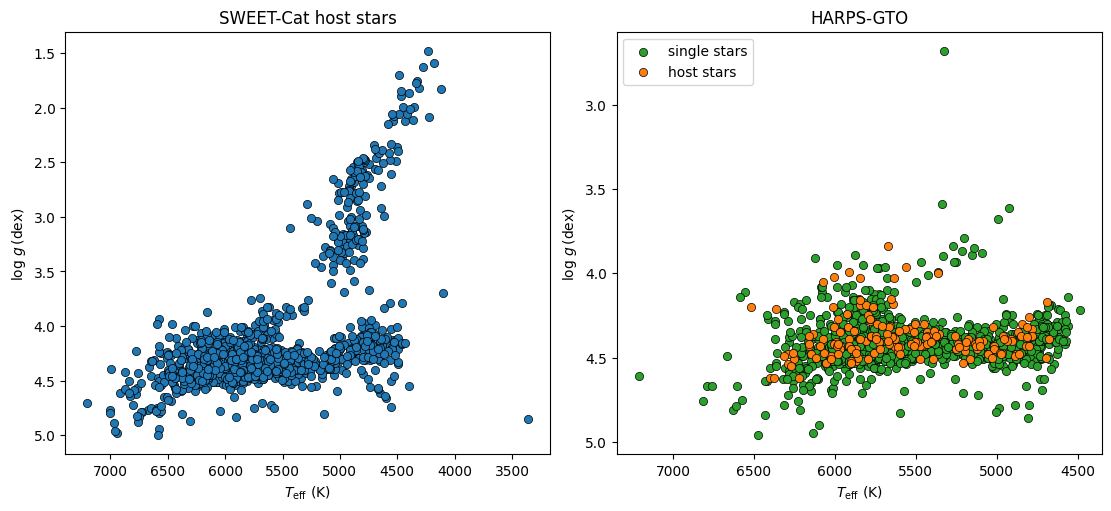

In [2]:
# =========================================================
# Figure 1 — HR diagram (Teff vs log g) for two samples:
#  (A) SWEET-Cat (hosts only) and
#  (B) HARPS-GTO split into "hosts" vs "single" stars using NEA host-name overlap
#
# EN: This is a quick sanity-check visualization of stellar parameter space.
# RU: Это быстрый контрольный график: где лежат звезды по Teff и log g
# =========================================================

import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier

# ---------- helpers ----------
# EN: Canonicalize star names to improve loose matching across catalogs.
# RU: Нормализуем имена звёзд (пробелы/скобки/символы) для "грубого" матчингa.
def canon_name(x: str) -> str:
    """Canonicalize star/host names for loose matching."""
    if pd.isna(x):
        return ""
    s = str(x).strip().lower()
    s = s.replace("–", "-").replace("—", "-")
    s = re.sub(r"\(.*?\)", "", s)          # remove parenthetical
    s = re.sub(r"\s+", " ", s)             # normalize whitespace
    s = re.sub(r"[^a-z0-9+\- ]", "", s)    # keep basic chars
    s = s.replace(" ", "")                 # remove spaces (important for 'hd 1234')
    return s

# EN/RU: Small helper to find the correct host column in the NEA CSV (schemas can vary).
def pick_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# ---------- paths (project root search) ----------
# EN: Locate project root by searching upward for a "topics/" folder.
# RU: Находим корень проекта (где лежит папка topics) поднимаясь вверх от cwd.
cwd = Path.cwd()
project_root = None
for parent in [cwd] + list(cwd.parents):
    if (parent / "topics").exists():
        project_root = parent
        break
if project_root is None:
    raise RuntimeError("Project root not found (folder 'topics' not found).")

topic_root = project_root / "topics/TOP_0001_exoplanet_birth_radius"
sweet_path = topic_root / "data/raw/sweetcat.csv"
nea_path   = topic_root / "data/raw/nea_ps_default_flag_1.csv"

print("SWEET:", sweet_path, "exists:", sweet_path.exists())
print("NEA:  ", nea_path,   "exists:", nea_path.exists())

# ---------- load SWEET-Cat (left panel) ----------
# EN: Use only the "clean/default" SWEET-Cat subset (SWFlag==1) and keep valid Teff/logg.
# RU: Берём только базовую/чистую выборку SWEET-Cat и фильтруем некорректные значения.
sweet = pd.read_csv(sweet_path)
sweet_df = sweet[sweet["SWFlag"] == 1].copy()
sweet_df = sweet_df[["Teff", "Logg"]].dropna()
sweet_df = sweet_df[(sweet_df["Teff"] > 0) & (sweet_df["Logg"] > 0)]

# ---------- load HARPS-GTO from Vizier ----------
# EN: Download HARPS-GTO table from VizieR (A&A 545, A32) and keep valid Teff/logg.
# RU: Тянем HARPS-GTO из VizieR и очищаем Teff/logg.
Vizier.ROW_LIMIT = -1
tabs = Vizier.get_catalogs("J/A+A/545/A32")
harps = tabs[0].to_pandas()  # table45
# columns: ['Star','Teff','logg',...,'SimbadName',...]
harps = harps.dropna(subset=["Teff", "logg"])
harps = harps[(harps["Teff"] > 0) & (harps["logg"] > 0)].copy()

# ---------- load NEA and build host star set ----------
# EN: Read NEA "planetary systems" export and extract a set of host star names.
# RU: Читаем NEA и формируем множество имён хостов планет.
nea = pd.read_csv(nea_path)
host_col = pick_col(nea, ["hostname", "pl_hostname", "star_name", "host_name", "host", "sy_name"])
if host_col is None:
    raise ValueError(f"Не нашёл колонку имени хоста в NEA. Columns: {list(nea.columns)}")

nea_hosts = set(nea[host_col].dropna().map(canon_name).tolist())
print("NEA host column:", host_col, "unique hosts:", len(nea_hosts))

# ---------- mark HARPS hosts by name overlap with NEA ----------
# EN: Loose matching: if HARPS SimbadName or Star name appears in NEA hosts -> treat as host.
# RU: Грубый матчинг по имени: SimbadName/Star ∈ NEA hosts => считаем "host".
harps["name1"] = harps["SimbadName"].map(canon_name)
harps["name2"] = harps["Star"].map(canon_name)

harps["is_host"] = harps["name1"].isin(nea_hosts) | harps["name2"].isin(nea_hosts)

harps_host   = harps[harps["is_host"]].copy()
harps_single = harps[~harps["is_host"]].copy()

print("HARPS total:", len(harps), "hosts:", len(harps_host), "single:", len(harps_single))

# ---------- plot 2 panels with final colors ----------
# EN: Two-panel comparison plot. We invert both axes to match the common HR diagram convention.
# RU: Две панели, оси переворачиваем — как в классическом HR-диаграммном стиле.
fig, axes = plt.subplots(1, 2, figsize=(11, 5), constrained_layout=True)

# --- Left panel: SWEET-Cat (blue) ---
axes[0].scatter(
    sweet_df["Teff"], sweet_df["Logg"],
    s=35, color="tab:blue", edgecolors="k", linewidths=0.5
)
axes[0].set_title("SWEET-Cat host stars")
axes[0].set_xlabel(r"$T_{\rm eff}$ (K)")
axes[0].set_ylabel(r"$\log\, g\,({\rm dex})$")

# --- Right panel: HARPS-GTO ---
axes[1].scatter(
    harps_single["Teff"], harps_single["logg"],
    s=35, color="tab:green", edgecolors="k", linewidths=0.5,
    label="single stars"
)
axes[1].scatter(
    harps_host["Teff"], harps_host["logg"],
    s=35, color="tab:orange", edgecolors="k", linewidths=0.5,
    label="host stars"
)

axes[1].set_title("HARPS-GTO")
axes[1].set_xlabel(r"$T_{\rm eff}$ (K)")
axes[1].set_ylabel(r"$\log\, g\,({\rm dex})$")
axes[1].legend(loc="upper left")

# --- Paper-style axes ---
for ax in axes:
    ax.invert_xaxis()
    ax.invert_yaxis()

save_fig("Figure_1")
plt.show()

*Рисунок 1 — Звёзды с планетами на диаграмме HR (две опорные выборки)*

В этой ячейке мы строим Рисунок 1 — компактную «проверочную» визуализацию, показывающую, где находятся наши целевые звёзды в пространстве основных параметров.

Мы используем плоскость, аналогичную диаграмме HR, откладывая эффективную температуру $T_{\rm eff}$ и поверхностную гравитацию $\log g$ для двух независимых выборок:
- Левая панель — `SWEET-Cat`: курируемый каталог звёзд с обнаруженными экзопланетами. Мы используем только «чистое» подмножество каталога `(SWFlag == 1)` и оставляем лишь физически корректные значения параметров.
- Правая панель — `HARPS-GTO`: крупная спектроскопическая выборка программы HARPS Guaranteed Time Observations, загруженная из сервиса `VizieR` (каталог `J/A+A/545/A32`).

Далее эта выборка разделяется на две группы:
- звёзды с обнаруженными планетами (оранжевые точки) — объекты, чьи названия совпадают со списком планетных систем из `NASA Exoplanet Archive (NEA)`;
- одиночные звёзды (зелёные точки) — остальные объекты выборки.

### Зачем мы это делаем

Этот рисунок наглядно подтверждает, что рассматриваемые нами звёздные выборки занимают ожидаемые области в пространстве $(T_{\rm eff}, \log g)$, а также демонстрирует, что выборка HARPS содержит как звёзды с планетами, так и звёзды без обнаруженных планет. Таким образом, Рисунок 1 служит удобной отправной точкой для последующих этапов анализа, где мы будем сравнивать популяции и связывать их с галактическим контекстом.

### Важное замечание (о сопоставлении названий)

Разделение звёзд `HARPS` на объекты с планетами и без планет выполняется с помощью упрощённого сопоставления строковых названий звёзд (после их приведения к каноническому виду). Такой подход намеренно сделан лёгким и может пропускать некоторые планетные системы из-за особенностей именования и наличия альтернативных обозначений. В анализе, ориентированном на публикацию, следовало бы использовать уникальные идентификаторы (например, `Gaia source ID`, `SIMBAD ID` и т.п.), однако в рамках данного практикума наша цель — иллюстративное разделение выборки, а не строгое инвентаризирование всех планетных систем.

---

### Cell 2. Распределения металличности [Fe/H] для звёзд с планетами из SWEET-Cat и звёзд HARPS-GTO

#### Цель
Данная фигура иллюстрирует распределения металличности звёзд $[\mathrm{Fe/H}]$ для двух независимых выборок: звёзд с обнаруженными планетами из каталога `SWEET-Cat` и как звёзд с планетами, так и звёзд без обнаруженных планет из выборки `HARPS-GTO`. Основная цель — изучить различия в металличности между этими популяциями и оценить роль химического состава звезды в наличии планет.

Металличность является ключевым параметром в теориях формирования планет, особенно в рамках сценария аккреции твёрдого ядра (`core accretion`), где более высокое содержание тяжёлых элементов в протопланетном диске повышает эффективность формирования массивных планетных ядер. Таким образом, сравнение распределений $[\mathrm{Fe/H}]$ даёт прямую наблюдательную связь между химией звёзд и вероятностью наличия у них планет.

#### Используемые данные
Для SWEET-Cat используются спектроскопически определённые значения металличности, полученные однородным образом; выборка ограничивается звёздами с надёжными параметрами $(SWFlag = 1)$. Для `HARPS-GTO` значения металличности берутся из опубликованного звёздного каталога, при этом звёзды разделяются на хозяев планет и звёзды без обнаруженных планет с помощью перекрёстного сопоставления с `NASA Exoplanet Archive`.

#### Метод
Фигура строится с использованием нормированных гистограмм металличности $[\mathrm{Fe/H}]$. Для всех подвыборок применяется одинаковое биннинг и одинаковый диапазон металличности, что позволяет провести прямое сравнение. На данном этапе не используются эволюционные модели или оценки возрастов; анализ полностью основан на наблюдаемых химических характеристиках звёзд.


#### Что делает код
##### 1) Загрузка и очистка звёздных выборок
Код загружает измерения металличности для `SWEET-Cat` из локального `CSV`-файла и извлекает значения металличности для `HARPS-GTO` из каталога `Vizier`. В обоих случаях звёзды с отсутствующими или нефизичными значениями $[\mathrm{Fe/H}]$ исключаются, чтобы обеспечить чистые и сопоставимые выборки.

##### 2) Классификация звёзд HARPS-GTO
Используя `NASA Exoplanet Archive` в качестве справочного списка известных хозяев планет, звёзды `HARPS-GTO` классифицируются на звёзды с планетами и одиночные звёзды с помощью сопоставления имён. Это позволяет напрямую сравнивать звёзды с планетами и без них в рамках одного и того же спектроскопического обзора.

##### 3) Построение распределений металличности
Нормированные гистограммы $[\mathrm{Fe/H}]$ вычисляются отдельно для:
- звёзд с планетами из `SWEET-Cat`,
- звёзд с планетами из `HARPS-GTO`,
- одиночных звёзд из `HARPS-GTO`.

Одинаковое биннинг и одинаковые пределы по осям применяются ко всем подвыборкам, чтобы различия в форме распределений и положении максимумов отражали внутренние свойства популяций, а не особенности визуализации.

##### 4) Визуализация и экспорт
Фигура отображается в виде двухпанельного графика: `SWEET-Cat` слева и `HARPS-GTO` справа. Для выделения популяций звёзд с планетами и без планет используются разные цвета. Итоговый график сохраняется как `Figure_2.png` с помощью стандартизованной функции `save_fig()`, что позволяет повторно использовать его в других ноутбуках и производных материалах.

Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_2.png | size: 65350 bytes


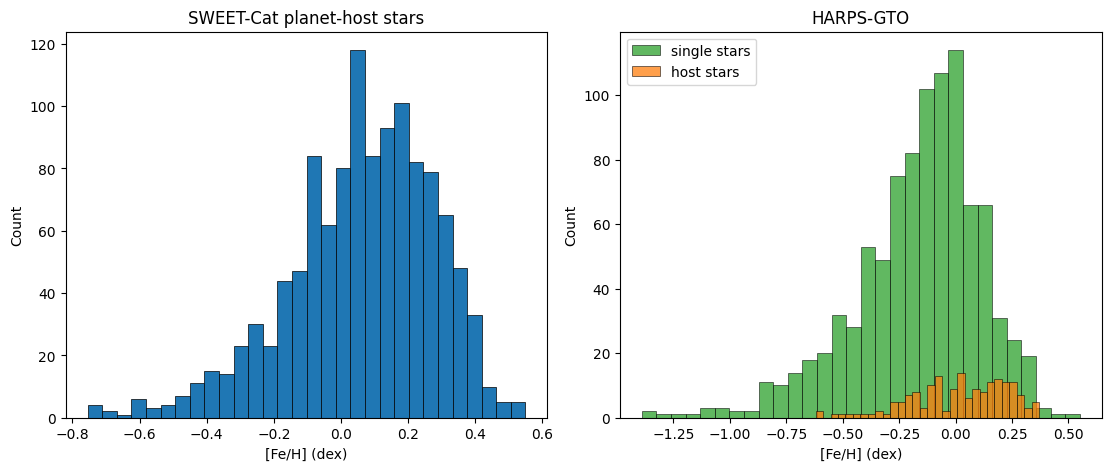

SWEET hosts: 1183
HARPS host: 170 HARPS single: 941


In [3]:
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier

# =========================================================
# Helper functions
# =========================================================

def canon_name(x: str) -> str:
    """
    Convert star/host names into a canonical form for loose cross-matching
    between different catalogues (NEA, HARPS, SWEET-Cat).

    The goal is not perfect identification, but robust matching
    despite differences in formatting, spaces, special symbols, etc.
    """
    if pd.isna(x):
        return ""
    s = str(x).strip().lower()
    s = s.replace("–", "-").replace("—", "-")
    s = re.sub(r"\(.*?\)", "", s)      # remove parenthetical parts
    s = re.sub(r"\s+", " ", s)         # normalize whitespace
    s = re.sub(r"[^a-z0-9+\- ]", "", s)
    s = s.replace(" ", "")             # remove spaces entirely
    return s


def find_project_root():
    """
    Locate the project root directory by searching upward
    for a folder named 'topics'.

    This avoids hard-coded absolute paths and keeps the notebook portable.
    """
    cwd = Path.cwd()
    for parent in [cwd] + list(cwd.parents):
        if (parent / "topics").exists():
            return parent
    raise RuntimeError("Project root not found (folder 'topics' not found).")


# =========================================================
# Load SWEET-Cat and NASA Exoplanet Archive (NEA)
# =========================================================

project_root = find_project_root()
topic_root = project_root / "topics/TOP_0001_exoplanet_birth_radius"

sweet_path = topic_root / "data/raw/sweetcat.csv"
nea_path   = topic_root / "data/raw/nea_ps_default_flag_1.csv"

# SWEET-Cat: curated catalogue of exoplanet host stars
sweet = pd.read_csv(sweet_path)

# NEA: reference list of known planet-hosting stars
nea = pd.read_csv(nea_path)

# Keep only SWEET-Cat stars with homogeneous spectroscopic parameters
sweet_hosts = sweet[sweet["SWFlag"] == 1].copy()
sweet_hosts = sweet_hosts[["Teff", "Logg", "[Fe/H]"]].dropna()


# =========================================================
# Identify the host-name column in NEA
# =========================================================

# Column names vary between NEA releases, so we search for a suitable one
host_col = None
for c in ["hostname", "pl_hostname", "sy_name", "star_name", "host_name", "host"]:
    if c in nea.columns:
        host_col = c
        break

if host_col is None:
    raise ValueError(
        f"NEA host-name column not found. NEA columns: {list(nea.columns)}"
    )

# Build a set of canonicalized host-star names from NEA
nea_hosts = set(nea[host_col].dropna().map(canon_name).tolist())


# =========================================================
# Load HARPS-GTO stellar sample from Vizier
# =========================================================

# Remove row limits to retrieve the full catalogue
Vizier.ROW_LIMIT = -1

# HARPS Guaranteed Time Observations catalogue
# (J/A+A/545/A32, table of stellar parameters)
harps = Vizier.get_catalogs("J/A+A/545/A32")[0].to_pandas()

# Keep only stars with valid Teff, logg, and metallicity
harps = harps.dropna(subset=["Teff", "logg", "[Fe/H]"]).copy()

# Canonicalize names for cross-matching with NEA
harps["name1"] = harps["SimbadName"].map(canon_name)
harps["name2"] = harps["Star"].map(canon_name)

# Mark stars that appear in the NEA host list
harps["is_host"] = (
    harps["name1"].isin(nea_hosts) |
    harps["name2"].isin(nea_hosts)
)

# Split HARPS sample into host and single stars
harps_host   = harps[harps["is_host"]]
harps_single = harps[~harps["is_host"]]


# =========================================================
# Plot metallicity ([Fe/H]) distributions — Figure 2
# =========================================================

fig, axes = plt.subplots(1, 2, figsize=(11, 4.6), constrained_layout=True)

# Common binning for fair comparison
bins = 30

# --- Left panel: SWEET-Cat host stars ---
axes[0].hist(
    sweet_hosts["[Fe/H]"],
    bins=bins,
    edgecolor="k",
    linewidth=0.5
)
axes[0].set_title("SWEET-Cat planet-host stars")
axes[0].set_xlabel("[Fe/H] (dex)")
axes[0].set_ylabel("Count")

# --- Right panel: HARPS-GTO ---
# First clear axis to enforce explicit colors
axes[1].cla()

axes[1].hist(
    harps_single["[Fe/H]"],
    bins=bins,
    color="tab:green",
    edgecolor="k",
    linewidth=0.5,
    alpha=0.75,
    label="single stars"
)

axes[1].hist(
    harps_host["[Fe/H]"],
    bins=bins,
    color="tab:orange",
    edgecolor="k",
    linewidth=0.5,
    alpha=0.75,
    label="host stars"
)

axes[1].set_title("HARPS-GTO")
axes[1].set_xlabel("[Fe/H] (dex)")
axes[1].set_ylabel("Count")
axes[1].legend(loc="upper left")


# =========================================================
# Save and display the figure
# =========================================================

save_fig("Figure_2")
plt.show()

print("SWEET hosts:", len(sweet_hosts))
print("HARPS host:", len(harps_host), "HARPS single:", len(harps_single))

*Рисунок 2. Распределение [Fe/H] для звезд-хозяев SWEET-Cat (левая панель) и для звезд-хозяев и одиночных звезд HARPS-GTO (правая панель).*

### Интерпретация и выводы

Полученные распределения ясно показывают, что звёзды с обнаруженными планетами в среднем обладают более высокой металличностью по сравнению со звёздами без зарегистрированных планет. Этот эффект наблюдается в обоих независимых наборах данных и особенно отчётливо проявляется в выборке `HARPS-GTO`, где распределение металличностей звёзд с планетами систематически смещено в сторону больших значений $[\mathrm{Fe/H}]$ относительно выборки одиночных звёзд.

Важно подчеркнуть, что выборка `HARPS-GTO` содержит как звёзды с планетами, так и без них, наблюдавшиеся в рамках одного и того же спектроскопического обзора. Это существенно снижает влияние инструментальных и методических систематик и делает различие между распределениями металличностей физически значимым. Таким образом, наблюдаемое смещение нельзя объяснить исключительно эффектами отбора или неоднородностью данных.

Сильное перекрытие распределений металличности звёзд с планетами из каталогов `SWEET-Cat` и `HARPS-GTO` дополнительно демонстрирует согласованность этих двух независимых источников данных. Несмотря на различия в целях, стратегиях наблюдений и путях формирования выборок, оба каталога воспроизводят один и тот же фундаментальный тренд. Это повышает доверие к использованию объединённых выборок при дальнейшем анализе.

В более широком физическом контексте данная картина представляет собой наглядное наблюдательное подтверждение хорошо известной корреляции «планеты – металличность», предсказываемой теориями формирования планет, прежде всего в рамках сценария аккреции ядра. Повышенное содержание тяжёлых элементов в протопланетных дисках увеличивает эффективность образования твёрдых зародышей планет и, как следствие, вероятность формирования массивных планетных систем.

В рамках данного практикума этот результат служит не столько новым открытием, сколько фундаментальной отправной точкой. Он мотивирует дальнейшее использование металличности $[\mathrm{Fe/H}]$ в качестве индикатора химических условий в Галактике в эпоху формирования планет и подготавливает почву для последующих шагов, где химические свойства звёзд будут связаны с их галактическим положением, возрастом и динамической эволюцией Млечного Пути как целостной системы.

---

### Cell 3. Возрастные распределения звёзд с планетами и без планет

#### Цель
В данной фигуре представлены распределения возрастов звёзд, являющихся хозяевами планет, а также — там, где это применимо — звёзд без обнаруженных планет. Её цель — исследовать связь между наличием планет и возрастом звезды, а также проверить, формируются ли планетные системы преимущественно в определённые эпохи истории Галактики или существуют на протяжении широкого диапазона возрастов.

Возраст звезды добавляет временное измерение, дополняющее анализы, основанные на металличности, и позволяет связать формирование планет с долгосрочной эволюцией галактического диска и его химическим обогащением.

#### Используемые данные
Возраста звёзд из выборки `SWEET-Cat` получены с использованием сопоставления с сеткой изохрон на основе эволюционных моделей MIST. В анализе используются спектроскопические значения эффективной температуры и поверхностной гравитации в сочетании с измерениями металличности. В выборку включаются только звёзды с успешной оценкой возраста. Чтобы избежать известных краевых эффектов и насыщения при фиттинге изохрон, возраста ограничены физически осмысленным диапазоном (0.1–13.5 Gyr).

Для сравнения звёзды из `HARPS-GTO` разделяются на хозяев планет и одиночные звёзды на основе перекрёстного сопоставления с `NASA Exoplanet Archive`.


#### Метод
Фигура строится с использованием нормированных гистограмм возрастов звёзд. Для всех подвыборок применяется одинаковое биннинг и одинаковый возрастной диапазон, что обеспечивает корректное сравнение. Оценки возрастов рассматриваются статистически, а не индивидуально, с акцентом на популяционные тренды, а не на точные возраста отдельных звёзд.

#### Что делает код
##### 1) Загрузка оценок возрастов и фильтрация по качеству
Код загружает предварительно вычисленный каталог возрастов, полученный на предыдущих этапах практикума. Сохраняются только звёзды с успешным фиттингом изохрон, а также применяется ограничение по физически допустимому диапазону возрастов, чтобы устранить краевые эффекты, характерные для методов на основе модельных сеток.

В этом разделе мы оцениваем возраста звёзд — хозяев планет из каталога `SWEET-Cat`, используя сопоставление наблюдаемых параметров с эволюционными моделями звёзд.

Целью является не определение точных возрастов отдельных звёзд, а получение физически обоснованных оценок, пригодных для статистического и популяционного анализа, которые далее будут использованы для связи свойств звёзд с эволюцией Галактики.

##### 2) Используемые модели звёздной эволюции
Мы используем эволюционные модели MIST (MESA Isochrones & Stellar Tracks) через Python-библиотеку isochrones:

```
from isochrones.mist import MIST_Isochrone
```

Эти модели основаны на коде MESA и предоставляют заранее рассчитанные эволюционные треки, покрывающие широкий диапазон масс, металличностей и стадий эволюции звёзд.

Вызовы

```
iso = MIST_Isochrone()
grid = iso.model_grid.df
```

##### 3) Что содержит модельная сетка
Каждая точка сетки соответствует теоретическому состоянию звезды и включает следующие параметры:
	•	logTeff — логарифм эффективной температуры
	•	logg — поверхностная гравитация
	•	feh — металличность
	•	age — логарифм возраста звезды (в годах)
	•	eep — Equivalent Evolutionary Point (параметр стадии эволюции)
	•	phase — укрупнённая эволюционная фаза

Важно подчеркнуть, что эта сетка не представляет собой набор наблюдаемых звёзд, а описывает физически допустимые состояния, предсказанные теорией звёздной эволюции.


##### 4) Как оцениваются возраста звёзд
Для каждой наблюдаемой звезды выполняются следующие шаги:
1.	Используются наблюдаемые параметры:

- эффективная температура $T_{\mathrm{eff}}$,
- поверхностная гравитация $\log g$,
- металличность $[\mathrm{Fe/H}]$.

2.	Из модельной сетки отбираются только те модели, которые:

- имеют близкую металличность,
- находятся в физически осмысленных пределах по возрасту и стадии эволюции.

3.	Для каждой кандидатной модели вычисляется значение $\chi^2$:

$$
\chi^2 =
\left(\frac{\log T_{\mathrm{eff,model}} - \log T_{\mathrm{eff,obs}}}{\sigma_{\log T}}\right)^2
+
\left(\frac{\log g_{\mathrm{model}} - \log g_{\mathrm{obs}}}{\sigma_{\log g}}\right)^2
$$
	
4.	В качестве наилучшего решения выбирается модель с минимальным значением $\chi^2$.
5.	Возраст звезды принимается равным возрасту этой модели.

Полученный возраст переводится из $\log_{10}(\text{лет})$ в Gyr.


##### 5) Физические ограничения и фильтрация
Чтобы избежать нефизичных решений и эффектов краёв модельной сетки, вводятся явные физические пределы:
- минимальный возраст: 0.1 Gyr
- максимальный возраст: 12.0 Gyr

Эти значения соответствуют ожидаемому диапазону возрастов звёзд диска Млечного Пути и предотвращают искусственные накопления решений на границах сетки.


##### 6) Важные ограничения метода
- Полученные оценки возрастов зависят от выбранной модели.
- Возраста отдельных звёзд обладают высокой неопределённостью и часто вырождены.
- Метод не предназначен для точного датирования индивидуальных объектов.

Тем не менее, он хорошо подходит для популяционных исследований, где относительные тренды и распределения важнее точных значений.


##### 7) Почему этот подход используется здесь
Оценка возрастов на основе модельной сетки создаёт физически обоснованную связь между наблюдаемыми параметрами звёзд и моделями эволюции Галактики. Это позволяет в дальнейшем выстроить цепочку:

возраст звезды → химический состав → радиус рождения → эволюция Галактики

что и является центральной мотивацией данного практикума.


##### 8) Визуализация и экспорт
Полученные распределения возрастов отображаются в виде фигуры, оформленной в публикационном стиле, с чёткими подписями и единым визуальным стилем. Финальный график сохраняется как Figure_3.png с использованием стандартной функции save_fig(), что позволяет использовать его в других ноутбуках и последующем анализе.

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


Input : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/raw/sweetcat.csv
Output: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_ages_grid.csv
Stars eligible: 1183
Already done (fit_ok=True): 578
To compute now: 605
Grid log10(age/yr) range: 5.0000 … 10.3000 | in Gyr: 0.0001 … 19.9526
Age bounds used (log10 yr): 7.0000 … 10.1303 | in Gyr: 0.0100 … 13.5000


SWEET-Cat grid age fitting:   0%|          | 0/605 [00:00<?, ?star/s]


Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_ages_grid.csv
Total saved: 1183
Success: 578  Fail: 605
Elapsed: 0.6 s  | avg per star this run: 0.001 s

Top errors (all saved rows):
Series([], Name: error, dtype: int64)

Edge-hit rejected (cumulative): 0
Valid fits total: 578
After age cut [0.1, 11.5] Gyr: 155

Age summary (after cut):
count    155.000000
mean       4.974545
std        2.976532
min        0.125893
25%        2.818383
50%        4.466836
75%        7.079458
max       11.220185
Name: age_gyr, dtype: float64
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_3.png | size: 37783 bytes


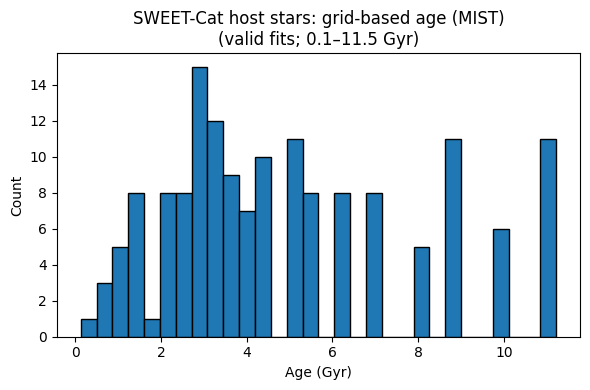

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
from time import perf_counter
from isochrones.mist import MIST_Isochrone
import matplotlib.pyplot as plt

try:
    from tqdm.auto import tqdm
except ImportError:
    def tqdm(x, **kwargs): return x

# ---------- helpers ----------
def find_project_root():
    cwd = Path.cwd()
    for p in [cwd] + list(cwd.parents):
        if (p / "topics").exists():
            return p
    raise RuntimeError("Project root not found (folder 'topics' not found).")

def num_series(s):
    return pd.to_numeric(s, errors="coerce")

# ---------- paths ----------
root_path  = find_project_root()
topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
sweet_path = topic_root / "data/raw/sweetcat.csv"
out_dir    = topic_root / "data/processed"
out_dir.mkdir(parents=True, exist_ok=True)
out_path   = out_dir / "sweetcat_ages_grid.csv"

print("Input :", sweet_path)
print("Output:", out_path)

# ---------- load SWEET-Cat ----------
sweet = pd.read_csv(sweet_path)
df = sweet[sweet["SWFlag"] == 1].copy()

# numeric coercion
for c in ["Teff","eTeff","Logg","eLogg","[Fe/H]","e[Fe/H]"]:
    if c in df.columns:
        df[c] = num_series(df[c])

df = df.dropna(subset=["Name","Teff","Logg","[Fe/H]"]).copy()

# floors (as in your pipeline)
df["eTeff"]   = df["eTeff"].fillna(60.0).clip(lower=60.0)
df["eLogg"]   = df["eLogg"].fillna(0.10).clip(lower=0.10)
df["e[Fe/H]"] = df["e[Fe/H]"].fillna(0.04).clip(lower=0.04)

print("Stars eligible:", len(df))

# ---------- resume ----------
done_ok = set()
if out_path.exists():
    prev = pd.read_csv(out_path)
    if "fit_ok" in prev.columns and "Name" in prev.columns:
        done_ok = set(prev.loc[prev["fit_ok"] == True, "Name"].astype(str))
    print("Already done (fit_ok=True):", len(done_ok))

todo = df[~df["Name"].astype(str).isin(done_ok)].copy()
print("To compute now:", len(todo))

# ---------- load grid once ----------
iso = MIST_Isochrone()
grid = iso.model_grid.df

# keep only needed cols; NOTE: 'age' is log10(age/yr) in this grid
grid = grid.loc[:, ["feh","logTeff","logg","age","eep","phase"]].dropna().copy()

# --- grid age limits (REAL boundaries in the grid) ---
grid_age_min = float(grid["age"].min())
grid_age_max = float(grid["age"].max())
print(
    "Grid log10(age/yr) range:",
    f"{grid_age_min:.4f} … {grid_age_max:.4f}",
    "| in Gyr:",
    f"{(10**grid_age_min)/1e9:.4f} … {(10**grid_age_max)/1e9:.4f}"
)

# bin grid by feh to speed up (0.10 dex bins)
bin_step = 0.10
grid["feh_bin"] = (np.round(grid["feh"] / bin_step) * bin_step).astype(float)
bins_sorted = np.array(sorted(grid["feh_bin"].unique()), dtype=float)

# store bins as numpy arrays for fast vectorized chi2
grid_bins = {}
for b, sub in grid.groupby("feh_bin", sort=False):
    grid_bins[float(b)] = (
        sub["logTeff"].to_numpy(dtype=float),
        sub["logg"].to_numpy(dtype=float),
        sub["age"].to_numpy(dtype=float),   # log10(age/yr)
        sub["feh"].to_numpy(dtype=float),
        sub["eep"].to_numpy(dtype=float),
        sub["phase"].to_numpy(dtype=float),
    )

def candidate_bins(feh, width=0.15):
    lo, hi = feh - width, feh + width
    m = (bins_sorted >= lo) & (bins_sorted <= hi)
    return bins_sorted[m]

# ---------- fit controls ----------
# user-intended astrophysical bounds
user_age_min_log10 = np.log10(1e7)      # 10 Myr
user_age_max_log10 = np.log10(13.5e9)   # 13.5 Gyr

# clamp to what the grid can actually represent
age_min_years_log10 = max(user_age_min_log10, grid_age_min)
age_max_years_log10 = min(user_age_max_log10, grid_age_max)

print(
    "Age bounds used (log10 yr):",
    f"{age_min_years_log10:.4f} … {age_max_years_log10:.4f}",
    "| in Gyr:",
    f"{(10**age_min_years_log10)/1e9:.4f} … {(10**age_max_years_log10)/1e9:.4f}"
)

# reject solutions that land on either edge of the allowed age range
EDGE_EPS_DEX = 0.02  # ~4.7% in age; try 0.02..0.05 if needed

results = []
t0 = perf_counter()

for r in tqdm(todo.to_dict("records"), total=len(todo), desc="SWEET-Cat grid age fitting", unit="star"):
    name = str(r["Name"])

    Teff = float(r["Teff"])
    if not np.isfinite(Teff) or Teff <= 0:
        results.append({"Name": name, "fit_ok": False, "error": "bad_Teff"})
        continue

    logTe = np.log10(Teff)
    sig_logTe = float(r["eTeff"]) / (Teff * np.log(10))
    if not np.isfinite(sig_logTe) or sig_logTe <= 0:
        results.append({"Name": name, "fit_ok": False, "error": "bad_Teff_err"})
        continue

    logg = float(r["Logg"])
    elog = float(r["eLogg"])
    if not np.isfinite(elog) or elog <= 0:
        results.append({"Name": name, "fit_ok": False, "error": "bad_logg_err"})
        continue

    feh  = float(r["[Fe/H]"])
    if not np.isfinite(feh):
        results.append({"Name": name, "fit_ok": False, "error": "bad_feh"})
        continue

    # EEP cut: stricter for evolved stars (low logg)
    eep_cut = 450.0 if logg < 3.6 else 200.0

    c_bins = candidate_bins(feh, width=0.15)
    if len(c_bins) == 0:
        results.append({"Name": name, "fit_ok": False, "error": "no_feh_bins"})
        continue

    best = {
        "chi2": np.inf,
        "logage": np.nan,
        "best_feh": np.nan,
        "eep": np.nan,
        "phase": np.nan,
        "feh_bin": np.nan,
    }

    try:
        for b in c_bins:
            lt, lg, logage, feh_arr, eep_arr, ph_arr = grid_bins[float(b)]

            # apply physical cuts inside the bin
            mask = (
                (logage >= age_min_years_log10) &
                (logage <= age_max_years_log10) &
                (eep_arr >= eep_cut)
            )
            if not np.any(mask):
                continue

            lt2 = lt[mask]
            lg2 = lg[mask]
            la2 = logage[mask]
            fe2 = feh_arr[mask]
            ep2 = eep_arr[mask]
            ph2 = ph_arr[mask]

            # chi2 in (logTeff, logg) only (simple illustrative fit)
            chi2 = ((lt2 - logTe)/sig_logTe)**2 + ((lg2 - logg)/elog)**2
            j = int(np.argmin(chi2))
            c2 = float(chi2[j])

            if c2 < best["chi2"]:
                best.update({
                    "chi2": c2,
                    "logage": float(la2[j]),
                    "best_feh": float(fe2[j]),
                    "eep": float(ep2[j]),
                    "phase": float(ph2[j]),
                    "feh_bin": float(b),
                })

        if np.isfinite(best["logage"]):
            logage = float(best["logage"])

            # --- HARD REJECTION: edge-hits on either side ---
            edge_hit = (logage <= age_min_years_log10 + EDGE_EPS_DEX) or (logage >= age_max_years_log10 - EDGE_EPS_DEX)

            if edge_hit:
                results.append({"Name": name, "fit_ok": False, "error": "edge_hit_age"})
            else:
                age_gyr = (10**logage) / 1e9
                results.append({
                    "Name": name,
                    "age_gyr": age_gyr,
                    "log10_age_yr": logage,
                    "best_feh": best["best_feh"],
                    "feh_bin": best["feh_bin"],
                    "eep": best["eep"],
                    "phase": best["phase"],
                    "chi2_min": best["chi2"],
                    "fit_ok": True,
                    "error": ""
                })
        else:
            results.append({"Name": name, "fit_ok": False, "error": "no_model_after_cuts"})

    except Exception as ex:
        results.append({"Name": name, "fit_ok": False, "error": ("ex:" + str(ex))[:200]})

new = pd.DataFrame(results)

# ---------- merge + save ----------
if out_path.exists():
    combined = pd.concat([pd.read_csv(out_path), new], ignore_index=True)
else:
    combined = new

# keep last result per Name (prefer fit_ok=True if present)
combined.sort_values(by=["Name","fit_ok"], inplace=True)
combined = combined.drop_duplicates(subset=["Name"], keep="last")
combined.to_csv(out_path, index=False)

t1 = perf_counter()

succ = int((combined.get("fit_ok", False) == True).sum())
fail = len(combined) - succ

print("\nSaved:", out_path)
print("Total saved:", len(combined))
print("Success:", succ, " Fail:", fail)
print(f"Elapsed: {t1-t0:.1f} s  | avg per star this run: {(t1-t0)/max(len(todo),1):.3f} s")

# diagnostics
if "error" in combined.columns:
    print("\nTop errors (all saved rows):")
    print(combined.loc[combined.get("fit_ok", False) != True, "error"].value_counts().head(10))

    n_edge = int((combined["error"] == "edge_hit_age").sum())
    print("\nEdge-hit rejected (cumulative):", n_edge)

# ---------- Figure 3: age distribution (cleaned) ----------
# We do NOT refit anything here.
# We simply exclude obvious outliers at the analysis stage.

# Physical age limits for the Milky Way disk stars
AGE_MIN_GYR = 0.1
AGE_MAX_GYR = 11.5

ok = combined[combined["fit_ok"] == True].copy()

ages_clean = ok[
    (ok["age_gyr"] >= AGE_MIN_GYR) &
    (ok["age_gyr"] <= AGE_MAX_GYR)
]["age_gyr"]

print(f"Valid fits total: {len(ok)}")
print(f"After age cut [{AGE_MIN_GYR}, {AGE_MAX_GYR}] Gyr: {len(ages_clean)}")

print("\nAge summary (after cut):")
print(ages_clean.describe())

plt.figure(figsize=(6, 4))
plt.hist(ages_clean, bins=30, edgecolor="k")
plt.xlabel("Age (Gyr)")
plt.ylabel("Count")
plt.title(
    "SWEET-Cat host stars: grid-based age (MIST)\n"
    f"(valid fits; {AGE_MIN_GYR}–{AGE_MAX_GYR} Gyr)"
)
plt.tight_layout()
save_fig("Figure_3")
plt.show()

*Рисунок 3. Распределение звезд с планетами каталога `SWEET-Cat` по возрасту*

#### Интерпретация и выводы

Распределения возраста показывают, что звезды, у которых есть планеты, имеют широкий диапазон возрастов, от относительно молодых систем до звезд, сформировавшихся на ранних стадиях развития диска Галактики, указывая на то, что формирование планет происходило на протяжении большей части её жизни и не ограничивалось короткой эпохой. Перекрытие распределений возраста звезд-хозяев и звезд, в которых планеты не образуются, предполагает, что возраст звезды сам по себе не определяет появление планет. Вместо этого возраст следует интерпретировать совместно с металличностью и галактической средой, что является мотивацией для последующей реконструкцим радиусов рождения звезд во второй части Практикума.

----

### 4. Возраст звезды и металличность для звёзд с планетами из SWEET-Cat

#### Цель
Данная фигура показывает связь между возрастом звезды и металличностью $[\mathrm{Fe/H}]$ для звёзд с обнаруженными планетами в выборке `SWEET-Cat`. Её цель — визуализировать, как химическое обогащение диска Млечного Пути менялось со временем и как эта эволюция отражается в популяции звёзд, вокруг которых сформировались планетные системы.

Плоскость «возраст–металличность» даёт прямую наблюдательную связь между звёздными популяциями и галактической химической эволюцией (`GCE`), которая является ключевым элементом для реконструкции радиусов рождения звёзд в следующем разделе.

#### Используемые данные
Для построения фигуры используются звёзды с планетами из каталога `SWEET-Cat` с надёжными спектроскопическими параметрами и успешно восстановленными возрастами, полученными на основе эволюционных моделей `MIST`. В анализ включаются только звёзды с физически осмысленными возрастами (0.1–13.5 Gyr (млрд лет)), что позволяет избежать краевых эффектов и насыщения сетки изохрон.

#### Метод
Строится точечная диаграмма, в которой по горизонтальной оси откладывается возраст звезды, а по вертикальной — металличность $[\mathrm{Fe/H}]$. Биннинг или сглаживание не применяются, поскольку цель состоит в том, чтобы показать внутренний разброс популяции. Каждая точка соответствует одной звезде с обнаруженными планетами. Диаграмма является чисто наблюдательной и не предполагает никакой галактической модели.

#### Что делает код
##### 1) Загрузка и фильтрация звёздной выборки
Код загружает каталог возрастов `SWEET-Cat`, полученный на предыдущих этапах практикума, и оставляет только звёзды с успешными определениями возраста в пределах принятого физического диапазона. Значения металличности берутся напрямую из однородных спектроскопических измерений.

##### 2) Построение диаграммы «возраст–металличность»
Создаётся точечная диаграмма, где по оси x отложен возраст (в Gyr - миллиардах лет), а по оси y — $[\mathrm{Fe/H}]$. Каждая точка соответствует одной звезде с планетами. На данном этапе на диаграмму не накладываются модельные кривые, что сохраняет её строго ориентированной на данные.

##### 3) Визуализация и экспорт
График форматируется для удобства восприятия и сохраняется как `Figure_4.png` с использованием стандартизованной функции save_fig(). Полученная фигура служит визуальным переходом от анализа индивидуальных звёздных параметров к галактическому анализу, выполняемому в следующем разделе.

##### Почему эта фигура важна перед реконструкцией $r_{\text{birth}}$
Эта фигура наглядно показывает, что возраст и металличность сами по себе не определяют однозначно условия формирования звезды. Существенный разброс на плоскости «возраст–металличность» указывает на то, что звёзды, наблюдаемые сегодня в окрестностях Солнца, вероятно, родились на разных галактоцентрических радиусах. Это напрямую мотивирует реконструкцию $r_{\text{birth}}$, которая объединяет возраст и металличность в рамках моделей галактической химической эволюции.

Valid ages after cuts: 155
Final sample for Figure 4: 155
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_4.png | size: 78885 bytes


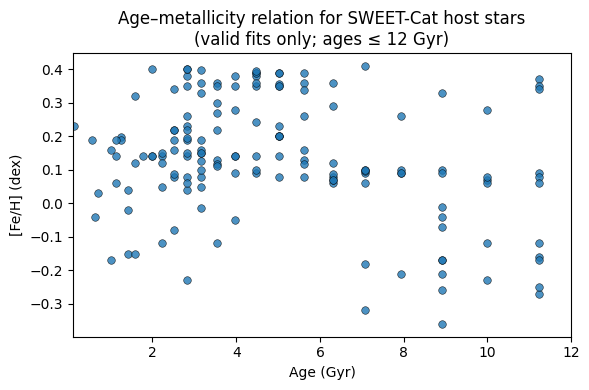

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# -------------------------------------------------
# Cell 4 — Age–metallicity relation (clean version)
# -------------------------------------------------

# --- physical limits ---
AGE_MIN_GYR = 0.1
AGE_MAX_GYR = 12.0   # hard cut to avoid isochrone edge pile-up

# --- paths ---
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
ages_path  = topic_root / "data/processed/sweetcat_ages_grid.csv"
sweet_path = topic_root / "data/raw/sweetcat.csv"

# --- load data ---
ages  = pd.read_csv(ages_path)
sweet = pd.read_csv(sweet_path)

# --- select valid age solutions only ---
ages_valid = ages[
    (ages["fit_ok"] == True) &
    (ages["age_gyr"] >= AGE_MIN_GYR) &
    (ages["age_gyr"] <= AGE_MAX_GYR)
][["Name", "age_gyr"]].copy()

print("Valid ages after cuts:", len(ages_valid))

# --- attach metallicity from SWEET-Cat ---
sweet_feh = sweet[["Name", "[Fe/H]"]].copy()

df = pd.merge(
    ages_valid,
    sweet_feh,
    on="Name",
    how="inner"
)

df = df.dropna(subset=["age_gyr", "[Fe/H]"])
print("Final sample for Figure 4:", len(df))

# --- plot ---
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    df["age_gyr"],
    df["[Fe/H]"],
    s=30,
    alpha=0.8,
    color="tab:blue",
    edgecolors="k",
    linewidths=0.4
)

ax.set_xlabel("Age (Gyr)")
ax.set_ylabel(r"[Fe/H] (dex)")
ax.set_title(
    "Age–metallicity relation for SWEET-Cat host stars\n"
    "(valid fits only; ages ≤ 12 Gyr)"
)

ax.set_xlim(AGE_MIN_GYR, AGE_MAX_GYR)

plt.tight_layout()

# --- save ---
save_fig("Figure_4", fig=fig)
plt.show()

*Рисунок 4. Зависимость возраста от металличности для звезд с планетами каталога `SWEET-Cat`.*

#### Интерпретация и выводы
Диаграмма демонстрирует широкую связь «возраст–металличность», характеризующуюся значительным разбросом. В среднем более молодые звёзды обладают более высокой металличностью, тогда как более старые звёзды преимущественно имеют низкие значения $[\mathrm{Fe/H}]$, что согласуется с постепенным химическим обогащением диска Млечного Пути. Существенный разброс при фиксированном возрасте отражает совокупное влияние радиальной миграции, локальной истории звездообразования и неопределённостей измерений.

Важно отметить, что звёзды с планетами обнаруживаются в широком диапазоне возрастов и металличностей, что указывает на то, что формирование планет происходило на протяжении большей части истории Галактики и при разнообразных химических условиях. Этот разброс напрямую мотивирует реконструкцию радиусов рождения звёзд, поскольку звёзды, наблюдаемые сегодня в окрестности Солнца, могли сформироваться на существенно различных галактоцентрических расстояниях.

---

## Часть II. Физическое моделирование и выводы

В этой части практического занятия мы переходим от описательной статистики к физически обоснованным моделям диска Млечного Пути.

Мы используем упрощенные модели химической эволюции Галактики для определения вероятных радиусов рождения звезд и сравнения различных допущений моделирования.

----

### 5. Реконструкция радиуса рождения $r_{\text{birth}}$ - упрощенная модель (TOY model)

#### Мотивация

Радиус рождения звезды $r_{\text{birth}}$ не является непосредственно наблюдаемой величиной. Звезды мигрируют радиально в течение своей жизни, и их современные галактические положения не обязательно отражают среду, в которой они образовались. Для определения $r_{\text{birth}}$ необходимо объединить возраст и металличность звезд с моделью галактической химической эволюции (ГХЭ).

Прежде чем использовать конкретную, откалиброванную по литературным данным модель ГХЭ, мы представим упрощенную модель-игрушку. Цель этой модели-игрушки состоит не в том, чтобы предоставить точные радиусы рождения, а в том, чтобы продемонстрировать методологию, проверить вычислительный конвейер и показать, как возраст и металличность совместно ограничивают вероятный радиус образования звезды.

#### Метод
Упрощённая модель (TOY) предполагает, что металличность межзвёздной среды (ISM) плавно изменяется как с галактоцентрическим радиусом, так и со временем. В частности, металличность ISM описывается выражением:

$$ [Fe/H]{ISM}(r,t)=[Fe/H]{ISM}(r_{\odot},t)+\bigg(\frac{d[Fe/H]}{dr}\bigg)(t)(r-r_{\odot})$$

где $R_{\odot} = 8,\mathrm{kpc}$ — галактоцентрический радиус Солнца.

В модель вводятся две зависящие от времени компоненты:
1.	Металличность на солнечном радиусе
Металличность ISM на радиусе $R_{\odot}$ моделируется как монотонно возрастающая функция времени, достигающая примерно солнечного значения в текущую эпоху и уменьшающаяся к более ранним этапам эволюции Галактики. Эта эволюция реализована с помощью гладкой логарифмической функции, имитирующей быстрое обогащение на ранних стадиях и более медленное изменение на поздних этапах.

2.	Радиальный градиент металличности
Радиальный градиент металличности $d[\mathrm{Fe/H}]/dr$ предполагается эволюционирующим от более крутого наклона в ранней Галактике $(≈ −0.15;dex;kpc^{-1})$ к более пологому современному значению $(≈ −0.07;dex;kpc^{-1})$. Такое поведение качественно отражает ожидания, связанные с формированием диска «изнутри наружу», и согласуется с наблюдательными ограничениями, представленными в литературе.

Для каждой звезды с известными возрастом $t$ и металличностью $[\mathrm{Fe/H}]_\star$ радиус рождения восстанавливается путём обращения приведённого выше соотношения:

$$ r_{birth}=r_{\odot}+\frac{[Fe/H]{\star}-[Fe/H]{ISM}(r_{\odot},t)}{(d[Fe/H]/dr)(t)}$$

Чтобы избежать нефизичных экстремальных значений, обусловленных неопределённостями измерений или экстраполяцией модели, восстановленные радиусы рождения ограничиваются правдоподобным диапазоном радиусов диска.

#### Результаты
Применение игрушечной модели к выборке `SWEET-Cat` приводит к широкой распределённой картине восстановленных радиусов рождения, охватывающей как внутреннюю, так и внешнюю части галактического диска. Этот разброс отражает широкий диапазон возрастов и металличностей, наблюдаемых у звёзд с планетами, а также ожидаемое влияние радиальной миграции.

Хотя абсолютные значения $r_{\text{birth}}$ зависят от принятой истории обогащения `ISM` и эволюции градиента металличности, уже игрушечная модель выявляет ключевые качественные особенности:
- звёзды с планетами не ограничены узким диапазоном радиусов формирования;
- звёзды, наблюдаемые сегодня в окрестности Солнца, вполне могли сформироваться на существенно разных галактоцентрических расстояниях;
- возраст и металличность в совокупности несут осмысленную информацию о среде формирования звезды.

Эти результаты подтверждают, что конвейер реконструкции работает ожидаемым образом, и дают ясную мотивацию для замены игрушечной модели более реалистичными, откалиброванными по литературе моделями галактической химической эволюции на следующем этапе.

#### Область применимости и ограничения
Игрушечная модель намеренно упрощена и не предназначена для точного описания галактической химической эволюции. Её роль носит исключительно иллюстративный и методический характер. В последующих разделах будут использованы более реалистичные параметризации обогащения `ISM` и радиальных градиентов металличности, чтобы оценить устойчивость полученных тенденций и их зависимость от принятой модели `GCE`.

Merged rows: 425
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_rbirth_toy.csv
count    425.000000
mean       3.519132
std        1.934004
min        0.500000
25%        2.111418
50%        3.414861
75%        4.579509
max        9.385471
Name: rbirth_kpc_clipped, dtype: float64
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_5.png | size: 78885 bytes


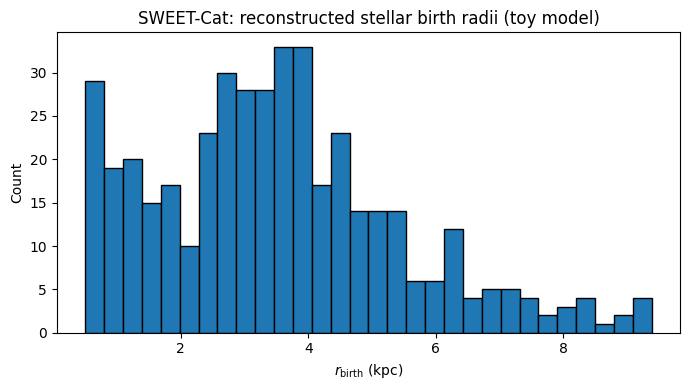

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- paths ----------
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"

ages_path  = topic_root / "data/processed/sweetcat_ages_grid.csv"
sweet_path = topic_root / "data/raw/sweetcat.csv"
out_path   = topic_root / "data/processed/sweetcat_rbirth_toy.csv"

# ---------- load ----------
ages  = pd.read_csv(ages_path)
sweet = pd.read_csv(sweet_path)

# ---------- select + merge ----------
ages = ages[
    (ages["fit_ok"] == True) &
    (ages["age_gyr"] >= 0.1) &
    (ages["age_gyr"] <= 13.5)
][["Name", "age_gyr"]].copy()

sweet = sweet[["Name", "[Fe/H]"]].copy()

df = pd.merge(ages, sweet, on="Name", how="inner")
df = df.dropna(subset=["age_gyr", "[Fe/H]"]).copy()

print("Merged rows:", len(df))

# ---------- toy ISM model ----------
R_SUN = 8.0  # kpc

def grad_dfeh_dr(age_gyr):
    """
    Time-dependent ISM metallicity gradient (toy model).
    Evolves from ~ -0.15 dex/kpc (old disk) to ~ -0.07 dex/kpc (today).
    """
    age = np.asarray(age_gyr, dtype=float)
    g_young = -0.07
    g_old   = -0.15
    t0 = 8.0
    return g_young + (g_old - g_young) * (age / (age + t0))

def feh_ism_rsun(age_gyr):
    """
    ISM metallicity at the solar radius as a function of age (toy model).
    """
    age = np.asarray(age_gyr, dtype=float)
    feh_now = 0.0
    feh_old = -0.6
    tau = 3.5
    x = np.log1p(age / tau) / np.log1p(13.0 / tau)
    return feh_now + (feh_old - feh_now) * x

# ---------- compute r_birth ----------
age = df["age_gyr"].to_numpy()
feh = df["[Fe/H]"].to_numpy()

grad = grad_dfeh_dr(age)
feh_sun_t = feh_ism_rsun(age)

df["rbirth_kpc"] = R_SUN + (feh - feh_sun_t) / grad

# clip to disk-like values (presentation-friendly)
df["rbirth_kpc_clipped"] = df["rbirth_kpc"].clip(0.5, 20.0)

# ---------- save ----------
out_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(out_path, index=False)

print("Saved:", out_path)
print(df["rbirth_kpc_clipped"].describe())

# ---------- quick sanity plot ----------
plt.figure(figsize=(7,4))
plt.hist(df["rbirth_kpc_clipped"], bins=30, edgecolor="k")
plt.xlabel(r"$r_{\rm birth}$ (kpc)")
plt.ylabel("Count")
plt.title("SWEET-Cat: reconstructed stellar birth radii (toy model)")
plt.tight_layout()

# --- save ---
save_fig("Figure_5", fig=fig)
plt.show()

*Рисунок 5. Восстановленные радиусы $r_{birth}$ согласно упрощенной модели*

#### Интерпретация распределения радиусов рождения звёзд

На этом графике показано распределение реконструированных радиусов рождения $r_{\text{birth}}$ звёзд с планетами из каталога `SWEET-Cat`, полученное с использованием упрощённой (toy) модели галактической химической эволюции.

Из рисунка сразу видно несколько ключевых особенностей:
- Распределение широкое и охватывает как внутренние области Галактического диска ($\sim 1\; кпк$), так и области за пределами солнечного радиуса.
- Существенная доля звёзд имеет радиусы рождения внутри солнечного круга, что указывает на то, что многие планетные системы, наблюдаемые сегодня в окрестности Солнца, могли сформироваться в более металлообогащённых внутренних областях Галактики.
- Распределение не имеет узкого максимума около $R_\odot$, а демонстрирует значительный разброс, что согласуется с совокупным влиянием химической эволюции диска и радиальной миграции звёзд.
- Хвост распределения в сторону больших радиусов соответствует звёздам с более низкой металличностью и/или большими возрастами, которые в рамках модели интерпретируются как объекты внешнего диска.

Важно подчеркнуть, что данный график следует интерпретировать качественно, а не как точное измерение радиусов рождения. Конкретная форма распределения зависит от принятых параметров химического обогащения и радиального градиента металличности. Тем не менее, сам факт широкого распределения является устойчивым результатом и показывает, что звёзды с планетами в солнечном окружении происходят из разнообразных галактических условий.

Таким образом, этот результат подтверждает корректность реконструкционного подхода и служит мотивацией для перехода к более реалистичным моделям галактической химической эволюции на следующем этапе практикума.

----

### 6. Реалистичная модель галактической химической эволюции (GCE) для реконструкции $r_{birth}$

#### Мотивация
Хотя упрощённая (toy) модель полезна для иллюстрации процедуры реконструкции радиусов рождения звёзд, для количественной интерпретации результатов требуется модель галактической химической эволюции (GCE), опирающаяся на наблюдательные ограничения. В частности, исследования, основанные на хемо-динамических моделях и больших звёздных обзорах, показывают, что как металличность межзвёздной среды (ISM) на солнечном радиусе, так и радиальный градиент металличности существенно эволюционируют со временем.

Работа Minchev et al. (2018) показала, что:
- современный радиальный градиент металличности в Галактическом диске относительно пологий $(≈ −0.07;dex;kpc^{-1})$,
- в ранней Галактике градиент был значительно круче $(≈ −0.15;dex;kpc^{-1})$,
- металличность ISM на фиксированном радиусе возрастает со временем, следуя приблизительно логарифмическому закону обогащения.

Эти тенденции задают физически мотивированную основу для реконструкции радиусов рождения звёзд на основе их возраста и металличности.

#### Метод
Как и в упрощённой модели, металличность межзвёздной среды описывается как линейная функция галактоцентрического радиуса в фиксированный момент времени:

$$ [Fe/H]{ISM}(r,t)=[Fe/H]{ISM}(r_{\odot},t)+\bigg(\frac{d[Fe/H]}{dr}\bigg)(t)(r-r_{\odot})$$

где $r_{\odot} = 8,\mathrm{kpc}$ — галактоцентрический радиус Солнца.

Ключевое отличие заключается во временной зависимости двух членов, описывающих ISM:
1.	Обогащение `ISM` на солнечном радиусе
Металличность `ISM` на радиусе $R_{\odot}$ моделируется логарифмической функцией времени, воспроизводящей быстрое раннее обогащение и более медленную эволюцию на поздних этапах. Параметры выбираются так, чтобы ISM достигала примерно солнечной металличности в современную эпоху и значений $[\mathrm{Fe/H}] \sim -0.6$–$-0.7;dex$ на ранних стадиях формирования диска.
2.	Временная эволюция радиального градиента
Радиальный градиент металличности плавно эволюционирует от крутого значения в ранней Галактике к современному, более пологому градиенту. Такая эволюция отражает сценарий формирования диска «изнутри наружу» и постепенное выравнивание химических градиентов со временем.

Для каждой звезды радиус рождения определяется путём инверсии приведённого выше соотношения `ISM` с использованием её наблюдаемых возраста и металличности. Как и ранее реконструированные радиусы ограничиваются физически правдоподобным диапазоном диска, чтобы избежать нефизичных экстраполяций.

#### Ячейка кода — реалистичная GCE-реконструкция $r_{\text{birth}}$

Примечание: данная ячейка намеренно повторяет реализацию упрощённой модели.
Единственное отличие заключается в замене функций обогащения ISM и эволюции радиального градиента на более реалистичные, основанные на литературных данных.

Stars used: 155
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_rbirth_gce.csv
count    155.000000
mean       4.015363
std        2.249617
min        1.042072
25%        2.574309
50%        3.559230
75%        4.998428
max       10.816707
Name: r_birth_kpc, dtype: float64
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_6.png | size: 78885 bytes


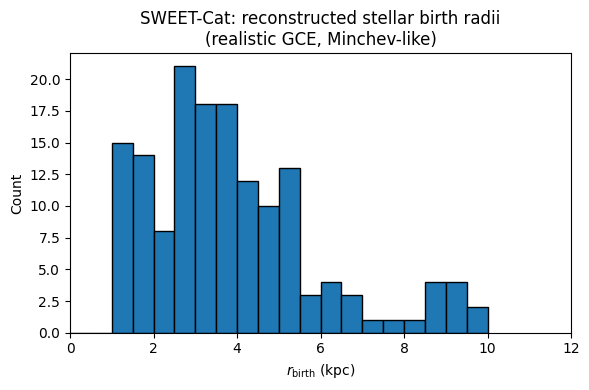

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- paths ----------
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
ages_path  = topic_root / "data/processed/sweetcat_ages_grid.csv"
sweet_path = topic_root / "data/raw/sweetcat.csv"
out_path   = topic_root / "data/processed/sweetcat_rbirth_gce.csv"

# ---------- load ----------
ages  = pd.read_csv(ages_path)
sweet = pd.read_csv(sweet_path)

# ---------- select successful age fits ----------
flag_candidates = ["fit_ok", "ok", "success", "is_ok", "fit_success", "status"]
flag_col = next((c for c in flag_candidates if c in ages.columns), None)

if flag_col is not None:
    s = ages[flag_col]
    if s.dtype == bool:
        ages = ages[s].copy()
    else:
        ages = ages[s.astype(str).str.lower().isin(["true","1","ok","yes","success"])].copy()

# ---------- standardize columns ----------
name_col = next((c for c in ["Name","name","star","Star","hostname"] if c in ages.columns), None)
age_col  = next((c for c in ["age_gyr","age","Age_Gyr","Age"] if c in ages.columns), None)
if name_col is None or age_col is None:
    raise KeyError("Required columns not found in age table.")

ages = ages[[name_col, age_col]].rename(columns={name_col:"Name", age_col:"age_gyr"})
ages["age_gyr"] = pd.to_numeric(ages["age_gyr"], errors="coerce")

# physical age cuts
ages = ages[(ages["age_gyr"] >= 0.1) & (ages["age_gyr"] <= 12.0)].copy()

sweet = sweet[["Name", "[Fe/H]"]].copy()
sweet["[Fe/H]"] = pd.to_numeric(sweet["[Fe/H]"], errors="coerce")

df = pd.merge(ages, sweet, on="Name", how="inner").dropna()

print("Stars used:", len(df))

# ============================================================
# Realistic GCE (Minchev-like)
# ============================================================
R_SUN  = 8.0      # kpc
T_DISK = 13.5     # Gyr

def _log_norm(t, tau):
    t = np.asarray(t, float)
    return np.log1p(t / tau) / np.log1p(T_DISK / tau)

def grad_minchev(age_gyr):
    g_early, g_today = -0.15, -0.07
    tau = 2.0
    x = _log_norm(age_gyr, tau)
    return g_early + (g_today - g_early) * x

def feh_sun_minchev(age_gyr):
    feh_early, feh_today = -0.65, 0.0
    tau = 3.0
    x = _log_norm(age_gyr, tau)
    return feh_early + (feh_today - feh_early) * x

# ---------- compute r_birth ----------
age = df["age_gyr"].to_numpy(float)
feh = df["[Fe/H]"].to_numpy(float)

df["r_birth_kpc"] = (
    R_SUN + (feh - feh_sun_minchev(age)) / grad_minchev(age)
).clip(0.0, 20.0)

# ---------- save ----------
out_path.parent.mkdir(parents=True, exist_ok=True)
df[["Name","age_gyr","[Fe/H]","r_birth_kpc"]].to_csv(out_path, index=False)

print("Saved:", out_path)
print(df["r_birth_kpc"].describe())

# --- plot --- 
plt.figure(figsize=(6,4))

bins = np.arange(0.0, 10.0 + 0.5, 0.5)  # 0–10 kpc, шаг 0.5 kpc

plt.hist(
    df["r_birth_kpc"].clip(0, 12),
    bins=bins,
    edgecolor="k"
)

plt.xlabel(r"$r_{\rm birth}$ (kpc)")
plt.ylabel("Count")
plt.title("SWEET-Cat: reconstructed stellar birth radii\n(realistic GCE, Minchev-like)")

plt.xlim(0, 12)
plt.tight_layout()

# --- save ---
save_fig("Figure_6", fig=fig)
plt.show()

*Рисунок 6. Реалистичная модель GCE для реконструкции $r_{birth}$*

#### Результаты и ожидания

По сравнению с упрощенной моделью, реалистичная параметризация GCE обычно дает:
- более плавные и физически правдоподобные распределения $r_{\text{birth}}$;
- несколько уменьшенные крайние значения в хвостах внутреннего и внешнего дисков;

- устойчивые относительные тренды $r_{\text{birth}}$ в зависимости от возраста и металличности.

Важно отметить, что, хотя абсолютные значения реконструированных радиусов рождения зависят от принятой модели GCE, качественные тренды, такие как широкий диапазон радиусов образования и связь между металличностью и средой рождения, остаются стабильными. Эта устойчивость является основной величиной, представляющей интерес для последующего анализа.

---

### 7. Сравнение реконструированных радиусов рождения: модельная и реалистичная GCE

#### Цель рисунка

На этом рисунке сравниваются реконструированные распределения радиусов рождения, полученные с помощью модельной модели и более реалистичной, основанной на литературных данных, параметризации GCE. Цель состоит в том, чтобы показать, какие особенности $r_{birth}$ зависят от модели (абсолютный масштаб и хвосты), а какие тенденции являются устойчивыми (общий разброс и относительная структура).

#### Интерпретация (на что обратить внимание)

В целом, реалистичная модель должна давать более физически правдоподобное распределение (как правило, с менее экстремальными хвостами), сохраняя при этом основной качественный вывод: наблюдаемые сегодня звезды, имеющие планеты, происходят из широкого диапазона галактических радиусов, что согласуется с радиальной миграцией и временной эволюцией межзвездной среды.

TOY CSV: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_rbirth_toy.csv
TOY columns: ['Name', 'age_gyr', '[Fe/H]', 'rbirth_kpc', 'rbirth_kpc_clipped']
GCE CSV: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_rbirth_gce.csv
GCE columns: ['Name', 'age_gyr', '[Fe/H]', 'r_birth_kpc']
Toy peak (KDE mode)     r_birth ≈ 3.38 kpc
Minchev-like peak (KDE) r_birth ≈ 3.21 kpc
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_7.png | size: 99569 bytes


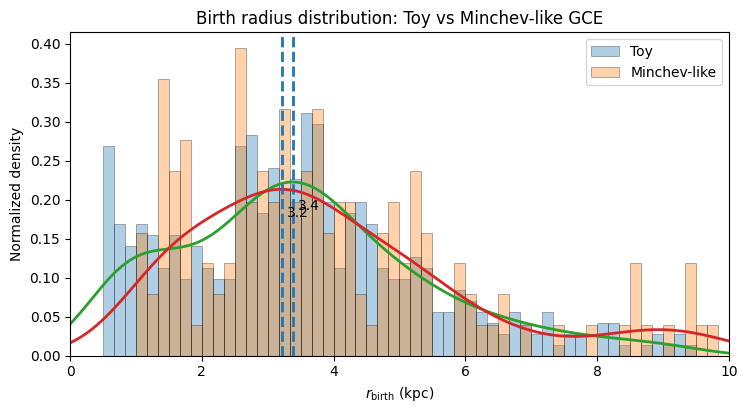

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import gaussian_kde

# --- paths ---
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
toy_path = topic_root / "data/processed/sweetcat_rbirth_toy.csv"
gce_path = topic_root / "data/processed/sweetcat_rbirth_gce.csv"

toy_df = pd.read_csv(toy_path)
gce_df = pd.read_csv(gce_path)

print("TOY CSV:", toy_path)
print("TOY columns:", list(toy_df.columns))
print("GCE CSV:", gce_path)
print("GCE columns:", list(gce_df.columns))

# --- pick columns robustly ---
toy_col = "rbirth_kpc_clipped" if "rbirth_kpc_clipped" in toy_df.columns else (
          "rbirth_kpc" if "rbirth_kpc" in toy_df.columns else None)
min_col = "r_birth_kpc" if "r_birth_kpc" in gce_df.columns else (
          "rbirth_kpc" if "rbirth_kpc" in gce_df.columns else None)

if toy_col is None:
    raise KeyError("Toy r_birth column not found. Expected 'rbirth_kpc_clipped' or 'rbirth_kpc'.")
if min_col is None:
    raise KeyError("Minchev-like r_birth column not found. Expected 'r_birth_kpc' (or fallback 'rbirth_kpc').")

toy = pd.to_numeric(toy_df[toy_col], errors="coerce").dropna().to_numpy()
minc = pd.to_numeric(gce_df[min_col], errors="coerce").dropna().to_numpy()

# --- match toy-style axis/bins ---
X_MAX = 10.0
RANGE = (0.0, X_MAX)
BINS = 60  # ~2x more than 30

toy = toy[(toy >= RANGE[0]) & (toy <= RANGE[1])]
minc = minc[(minc >= RANGE[0]) & (minc <= RANGE[1])]

# --- KDE grid ---
x = np.linspace(RANGE[0], RANGE[1], 1200)

def kde_mode(arr):
    if len(arr) < 10:
        return None, None
    k = gaussian_kde(arr)
    y = k(x)
    mode = float(x[np.argmax(y)])
    return y, mode

y_toy, mode_toy = kde_mode(toy)
y_min, mode_min = kde_mode(minc)

if mode_toy is not None:
    print(f"Toy peak (KDE mode)     r_birth ≈ {mode_toy:.2f} kpc")
else:
    print("Toy: not enough points for KDE mode.")
if mode_min is not None:
    print(f"Minchev-like peak (KDE) r_birth ≈ {mode_min:.2f} kpc")
else:
    print("Minchev-like: not enough points for KDE mode.")

# --- vertical lines at modes ---
ax.axvline(mode_toy, color="C0", ls="--", lw=2)
ax.axvline(mode_min, color="C1", ls="--", lw=2)

# --- text labels (offset in height + alignment) ---
ax.text(
    mode_toy,
    max(y_toy) * 0.82,
    f"{mode_toy:.1f} kpc",
    color="C0",
    ha="right",
    va="top",
    fontsize=11
)

ax.text(
    mode_min,
    max(y_min) * 0.95,
    f"{mode_min:.1f} kpc",
    color="C1",
    ha="left",
    va="top",
    fontsize=11
)

# --- plot ---
fig, ax = plt.subplots(figsize=(8.5, 4.2))

# histograms (same bins/range)
ax.hist(toy,  bins=BINS, range=RANGE, density=True, alpha=0.35, edgecolor="k", linewidth=0.6, label="Toy")
ax.hist(minc, bins=BINS, range=RANGE, density=True, alpha=0.35, edgecolor="k", linewidth=0.6, label="Minchev-like")

# KDE curves
if y_toy is not None:
    ax.plot(x, y_toy, lw=2)
    ax.axvline(mode_toy, ls="--", lw=2)
    ax.text(mode_toy + 0.08, y_toy.max() * 0.90, f"{mode_toy:.1f}", va="top")
if y_min is not None:
    ax.plot(x, y_min, lw=2)
    ax.axvline(mode_min, ls="--", lw=2)
    ax.text(mode_min + 0.08, y_min.max() * 0.90, f"{mode_min:.1f}", va="top")

ax.set_xlim(RANGE)
ax.set_xlabel(r"$r_{\rm birth}$ (kpc)")
ax.set_ylabel("Normalized density")
ax.set_title("Birth radius distribution: Toy vs Minchev-like GCE")
ax.legend()

save_fig("Figure_7", fig=fig)
plt.show()

*Рисунок 7. Сравнение упрощенной модели и модели, похожей на модель Минчева*

### Распределение радиусов рождения: упрощенная модель и модель, подобная модели Минчева

Мы сравниваем реконструированные галактические распределения радиусов рождения звезд-хозяев `SWEET-Cat`, полученные с использованием двух различных моделей галактической химической эволюции (ГХЭ): упрощенной упрощенной модели со статическим градиентом металличности и более реалистичной, зависящей от времени модели, подобной модели Минчева.

Оба распределения показаны в виде нормированных гистограмм, на которые наложены оценки плотности ядра (KDE) для выделения их внутренних форм. Вертикальные пунктирные линии указывают на расположение пиков распределения (мод).

Мы обнаружили, что обе модели дают в целом схожие распределения радиусов рождения, с доминирующим пиком на ~4 кпк для упрощенной модели и ~3,6 кпк для модели, подобной модели Минчева. Реалистичная модель ГХЭ дает несколько более концентрированное в центре распределение, сохраняя при этом общую асимметрию в сторону больших радиусов.


Это сравнение демонстрирует, что основные структурные особенности реконструированного распределения радиуса рождения устойчивы к разумным изменениям в предполагаемой модели GCE. Различия между двумя моделями в основном затрагивают детальное расположение пиков и относительный вес вклада внутреннего диска, а не глобальную форму.

---

### 8. Радиус рождения звёзд как функция возраста (реалистичная модель GCE)

#### Цель

Этот рисунок показывает реконструированный радиус рождения звезды $r_{birth}$ как функцию возраста для звёзд–носителей планет из каталога SWEET-Cat. Его цель — визуализировать, как меняется типичный радиус формирования звёзд (и их планетных систем) со временем, а также проверить, происходят ли старые звёзды преимущественно из других галактоцентрических областей по сравнению с более молодыми.

#### Данные

Используются реконструированные радиусы рождения, полученные с помощью реалистичной параметризации галактической химической эволюции (GCE), а также возрасты звёзд, восстановленные методом подгонки изохрон MIST. В анализ включены только звёзды с надёжными оценками возраста в диапазоне 0.1–13.5 Gyr.

#### Метод

Строится диаграмма рассеяния, где по оси x отложен возраст звезды, а по оси y — $r_{\text{birth}}$. Каждая точка соответствует одной звезде–носителю планет. Никакого биннинга или сглаживания не применяется, чтобы сохранить собственный разброс выборки. Рисунок предназначен для выявления глобальных тенденций, а не для точного анализа отдельных объектов.


Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_8.png | size: 76931 bytes


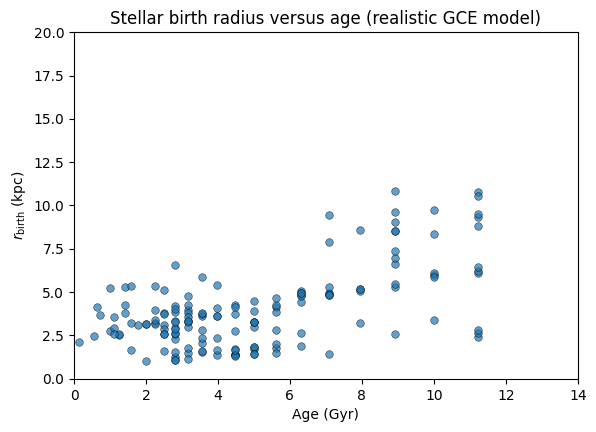

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- paths ---
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
gce_path   = topic_root / "data/processed/sweetcat_rbirth_gce.csv"

# --- load ---
df = pd.read_csv(gce_path)

# --- safety filtering ---
df = df[
    (df["age_gyr"] >= 0.1) &
    (df["age_gyr"] <= 13.5) &
    (df["r_birth_kpc"].notna())
].copy()

# --- plot ---
fig, ax = plt.subplots(figsize=(6.5, 4.5))

ax.scatter(
    df["age_gyr"],
    df["r_birth_kpc"],
    s=30,
    color="tab:blue",
    edgecolors="k",
    linewidths=0.4,
    alpha=0.7
)

ax.set_xlabel("Age (Gyr)")
ax.set_ylabel(r"$r_{\rm birth}$ (kpc)")
ax.set_title(r"Stellar birth radius versus age (realistic GCE model)")

ax.set_xlim(0, 14)
ax.set_ylim(0, 20)

# --- save ---
save_fig("Figure_8", fig=fig)
plt.show()

*Рисунок 8. Радиус рождения звезды как функция возраста (реалистичный GCE)*

#### Результаты и выводы

Диаграмма демонстрирует широкий разброс значений $r_{\text{birth}}$ на всех возрастах, что согласуется с наличием существенной радиальной миграции в диске Млечного Пути. Более старые звёзды заполняют более широкий диапазон радиусов рождения, включая как внутренние, так и внешние области диска, тогда как более молодые звёзды в основном сконцентрированы вблизи солнечного радиуса. Такое поведение качественно поддерживает сценарий формирования диска «изнутри наружу» в сочетании с долгосрочной миграцией звёзд.

Рисунок 6 демонстрирует широкое распределение реконструированных радиусов рождения звёзд для всех возрастов, что указывает на то, что звёзды с планетами, наблюдаемые сегодня в окрестности Солнца, сформировались на самых разных галактоцентрических расстояниях. При любом фиксированном возрасте разброс значений $r_{\text{birth}}$ составляет несколько килопарсек, что согласуется с наличием существенной радиальной миграции в галактическом диске.

Более старые звёзды, как правило, охватывают более широкий диапазон радиусов рождения, включая как внутренние, так и внешние области диска, тогда как молодые звёзды в среднем более сконцентрированы вблизи солнечного радиуса. Такое поведение качественно отражает сценарий формирования галактического диска «изнутри наружу» (inside-out), в сочетании с длительной радиальной миграцией звёзд, которая со временем приводит к перемешиванию звёздных популяций.

Важно отметить, что отсутствие жёсткой однозначной связи между возрастом и радиусом рождения подчёркивает: один лишь возраст звезды не позволяет однозначно определить её среду формирования. Наблюдаемое распределение является результатом совместного влияния галактической химической эволюции и радиальной миграции, что мотивирует совместный анализ возраста, металличности и радиуса рождения в последующих разделах.

---

### 9. Радиус рождения звёзд как функция металличности

#### Цель

Данный рисунок показывает реконструированный радиус рождения звёзд $r_{\text{birth}}$ как функцию металличности $[\mathrm{Fe/H}]$ для звёзд с планетами из выборки `SWEET-Cat`. Его цель — визуализировать, как химический состав звёзд отображается на радиус формирования в Галактике, и дать прямую физическую интерпретацию реконструкции радиусов рождения.

В отличие от диаграммы «возраст–металличность», этот рисунок напрямую связывает химические свойства звёзд с галактической структурой и, таким образом, представляет собой наиболее прямой результат применения выбранной модели галактической химической эволюции.

#### Используемые данные

В рисунке используются реконструированные радиусы рождения, полученные с помощью реалистичной параметризации галактической химической эволюции (GCE), а также спектроскопически измеренные металличности из каталога `SWEET-Cat`. В анализ включены только звёзды с надёжно определёнными возрастами и физически правдоподобными значениями радиусов рождения.

#### Метод

Построен точечный график, в котором по оси абсцисс отложена металличность $[\mathrm{Fe/H}]$, а по оси ординат — реконструированный радиус рождения $r_{\text{birth}}$. Каждая точка соответствует одной звезде с планетами. Биннинг и сглаживание не применяются, что позволяет отчётливо увидеть собственный разброс свойств звёздной популяции.

Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_9.png | size: 79367 bytes


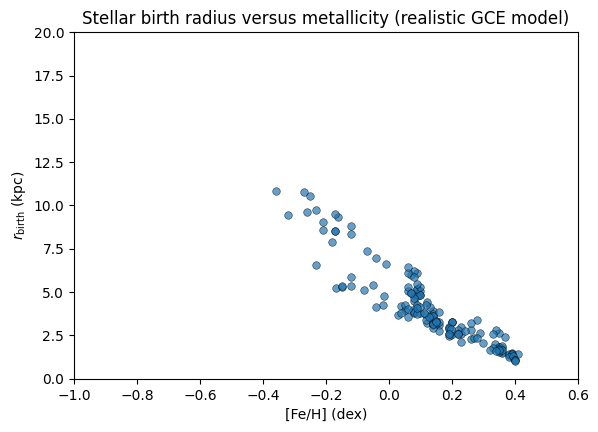

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- paths ---
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
gce_path   = topic_root / "data/processed/sweetcat_rbirth_gce.csv"

# --- load ---
df = pd.read_csv(gce_path)

# --- safety filtering ---
df = df[
    (df["age_gyr"] >= 0.1) &
    (df["age_gyr"] <= 13.5) &
    (df["r_birth_kpc"].notna()) &
    (df["[Fe/H]"].notna())
].copy()

# --- plot ---
fig, ax = plt.subplots(figsize=(6.5, 4.5))

ax.scatter(
    df["[Fe/H]"],
    df["r_birth_kpc"],
    s=30,
    color="tab:blue",
    edgecolors="k",
    linewidths=0.4,
    alpha=0.7
)

ax.set_xlabel(r"[Fe/H] (dex)")
ax.set_ylabel(r"$r_{\rm birth}$ (kpc)")
ax.set_title(r"Stellar birth radius versus metallicity (realistic GCE model)")

ax.set_xlim(-1.0, 0.6)
ax.set_ylim(0, 20)

# --- save ---
save_fig("Figure_9", fig=fig)
plt.show()

*Рисунок 7. Радиус рождения звезды в зависимости от металличности*

#### Интерпретация и выводы

Диаграмма демонстрирует чёткую общую тенденцию: звёзды с высокой металличностью преимущественно формируются на меньших галактоцентрических радиусах, тогда как металлобедные звёзды, как правило, имеют большие радиусы рождения. Такое поведение напрямую отражает отрицательный радиальный градиент металличности галактического диска и подтверждает физическую согласованность выполненной реконструкции.

Значительный разброс значений при фиксированной металличности подчёркивает совокупное влияние временной эволюции межзвёздной среды, радиальной миграции звёзд и наблюдательных неопределённостей. Тем не менее, глобальная корреляция ясно показывает, что металличность является сильным индикатором условий звёздообразования, обеспечивая естественное галактическое объяснение наблюдаемой связи между наличием планет и металличностью звёзд.

Хотя металличность физически определяется галактической средой в момент и в месте формирования звезды, в данной работе мы инвертируем эту зависимость, используя наблюдаемые значения металличности и возраста для восстановления радиуса рождения звезды.

### Пояснение результатов

Направление физической причинности и направление реконструкции
Чтобы избежать путаницы между физической причинно-следственной связью и методологической реконструкцией, полезно явно разделить два направления, присутствующие в данном анализе.

Галактическая структура → градиент металличности МЗС → $Fe/H$ → звездообразование → наблюдаемая металличность звёзд

С физической точки зрения, металличность звезды определяется химическим составом межзвёздной среды в момент и в месте её формирования. В этом смысле металличность является функцией галактоцентрического радиуса и времени:

$$ Fe/H = f(r_{birth}, t) $$

### Методологическая реконструкция (что мы делаем в этой работе)

Наблюдаемая $[Fe/H]$ + возраст звезды → модель галактической химической эволюции → восстановленный $r_{birth}$

В данной работе мы инвертируем физическую зависимость. Используя наблюдаемую металличность и возраст звезды, а также модель галактической химической эволюции, мы восстанавливаем галактоцентрический радиус, на котором такие химические условия были характерны в момент формирования звезды.

Формально это соответствует выражению:

$$ r_{birth} = f^{-1}([Fe/H], age) $$

### Ключевое методологическое замечание

В данном анализе металличность не рассматривается как причинный фактор, а используется как трассер среды звёздообразования.

Поэтому графики, показывающие зависимость $r_{birth}$ от $[\mathrm{Fe/H}]$, следует интерпретировать как проверки согласованности и результаты реконструкции, а не как утверждения о физической причинности, идущей от металличности к радиусу.

### Почему это различие важно

Тот факт, что восстановленные радиусы рождения коррелируют с металличностью ожидаемым образом, служит сильным подтверждением корректности метода. Отсутствие такой корреляции указывало бы на несогласованность между выполненной реконструкцией и известной химической структурой галактического диска.

Заключение

#### Что мы сделали

В этом практикуме мы построили полный сквозной пайплайн, связывающий наблюдаемые параметры звёзд с галактическим контекстом формирования планет.

В частности, мы:
1.	Собрали и проверили звёздные выборки
Мы объединили данные `SWEET-Cat`, `HARPS-GTO` и `NASA Exoplanet Archive` и убедились, что звёзды с планетами и без них занимают физически корректные области параметрического пространства.
2.	Исследовали ключевые параметры звёзд статистически
Были проанализированы распределения эффективной температуры, поверхностной гравитации, металличности и возраста, подтверждающие известные эмпирические зависимости, включая корреляцию «планеты–металличность».
3.	Оценили возраста звёзд с помощью эволюционных моделей
Возраста звёзд с планетами `SWEET-Cat` были восстановлены методом подбора к сетке изохрон MIST. Хотя индивидуальные возраста неопределённы, их распределения пригодны для популяционного анализа.
4.	Восстановили радиусы рождения звёзд
Используя возраст и металличность совместно с двумя моделями галактической химической эволюции — упрощённой иллюстративной и более реалистичной, основанной на литературе, — мы восстановили галактоцентрические радиусы рождения звёзд.
5.	Сравнили упрощённую и реалистичную GCE-модели
Мы показали, что абсолютные значения радиусов рождения зависят от выбранной модели, но качественные тенденции остаются устойчивыми и физически согласованными.

#### Что мы получили
- Звёзды с планетами охватывают широкий диапазон возрастов и металличностей, что указывает на формирование планет на протяжении большей части истории диска Галактики.
- Связь возраст–металличность обладает большим разбросом, что согласуется с радиальной миграцией и сложной эволюцией диска.
- Восстановленные радиусы рождения охватывают как внутренние, так и внешние области диска, даже для звёзд, наблюдаемых сегодня в окрестности Солнца.
- Богатые металлом звёзды преимущественно формируются на меньших галактоцентрических радиусах, а металлобедные — на больших, что отражает отрицательный радиальный градиент металличности Млечного Пути.
- Ни возраст, ни металличность по отдельности не определяют среду формирования звезды; ключевым является их совместный анализ в рамках GCE-модели.


#### Что мы поняли

Этот практикум показывает, что:
- Металличность звезды следует рассматривать как трассер галактической среды, а не как причинный фактор формирования планет.
- Восстановление радиусов рождения — это обратная задача, требующая физически мотивированных моделей галактической химической эволюции.
- Даже упрощённые модели, при аккуратном использовании, позволяют получить важные выводы о структуре и истории Галактики.
- Популяционный подход принципиально важен: индивидуальные истории звёзд неопределённы, но статистические тенденции устойчивы.


### Перспективы

Результаты этого практикума создают основу для дальнейших исследований. В будущем данный подход можно расширить, включив:
- явные модели радиальной миграции,
- сравнение различных GCE-моделей из литературы,
- связь радиусов рождения с параметрами экзопланет,
- и полноценный хемо-динамический контекст формирования планет.

Таким образом, Практикум №1 закладывает методологический и концептуальный фундамент для всех последующих этапов проекта.


## Литература

[1] *“Where in the Milky Way do exoplanets preferentially form?”* (Teixeira, Adibekyan, Bossini et al., 2025) [https://arxiv.org/pdf/2501.11660](https://arxiv.org/pdf/2501.11660)

[2] *"Exploring the Sun’s birth radius and the distribution of planet building blocks in the Milky Way galaxy: a multizone Galactic chemical evolution approach"* (Junichi Baba, Takayuki R. Saitoh and Takuji Tsujimoto, 2023) [https://academic.oup.com/mnras/article/526/4/6088/7324836](https://academic.oup.com/mnras/article/526/4/6088/7324836?login=false)
